In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data_glass = pd.read_csv("banana.csv")
data_glass.head()

,At1,At2,Class
0,1.140,-0.114,-1
1,-1.520,-1.150,1
2,-1.050,0.720,-1
3,-0.916,0.397,1
4,-1.090,0.437,1


In [3]:
X = data_glass.iloc[:,0:2].values
y = data_glass.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [4]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.8896512292738707

In [5]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[882  83]
 [110 674]]


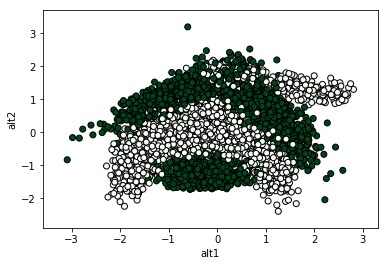

In [6]:
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Greens_r,
            edgecolor='k')
plt.xlabel('RMSSD')
plt.ylabel('BSV')

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel("alt1")
plt.ylabel("alt2")
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report



# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [60, 80],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [26]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
rf.fit(X_train, y_train)

# grid_search.best_params_


best_grid = grid_search.best_estimator_
y_true, y_pred = y_test, rf.predict(X_test)
print(classification_report(y_true, y_pred))


print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] min_samples_leaf=3, bootstrap=True, max_depth=60, min_samples_split=8, n_estimators=100 
[CV] min_samples_leaf=3, bootstrap=True, max_depth=60, min_samples_split=8, n_estimators=100 
[CV] min_samples_leaf=3, bootstrap=True, max_depth=60, min_samples_split=8, n_estimators=100 
[CV] min_samples_leaf=3, bootstrap=True, max_depth=60, min_samples_split=8, n_estimators=200 
[CV]  min_samples_leaf=3, bootstrap=True, max_depth=60, min_samples_split=8, n_estimators=100, total=   0.6s
[CV]  min_samples_leaf=3, bootstrap=True, max_depth=60, min_samples_split=8, n_estimators=100, total=   0.6s
[CV] min_samples_leaf=3, bootstrap=True, max_depth=60, min_samples_split=8, n_estimators=200 
[CV] min_samples_leaf=3, bootstrap=True, max_depth=60, min_samples_split=8, n_estimators=200 
[CV]  min_samples_leaf=3, bootstrap=True, max_depth=60, min_samples_split=8, n_estimators=100, total=   0.8s
[CV] min_samples_leaf=3, bootstrap=True, max_de

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.5s


[CV]  min_samples_leaf=5, bootstrap=True, max_depth=60, min_samples_split=8, n_estimators=100, total=   0.7s
[CV] min_samples_leaf=5, bootstrap=True, max_depth=60, min_samples_split=8, n_estimators=100 
[CV]  min_samples_leaf=4, bootstrap=True, max_depth=60, min_samples_split=12, n_estimators=200, total=   1.4s
[CV] min_samples_leaf=5, bootstrap=True, max_depth=60, min_samples_split=8, n_estimators=100 
[CV]  min_samples_leaf=4, bootstrap=True, max_depth=60, min_samples_split=12, n_estimators=200, total=   1.3s
[CV] min_samples_leaf=5, bootstrap=True, max_depth=60, min_samples_split=8, n_estimators=200 
[CV]  min_samples_leaf=5, bootstrap=True, max_depth=60, min_samples_split=8, n_estimators=100, total=   0.7s
[CV] min_samples_leaf=5, bootstrap=True, max_depth=60, min_samples_split=8, n_estimators=200 
[CV]  min_samples_leaf=4, bootstrap=True, max_depth=60, min_samples_split=12, n_estimators=200, total=   1.6s
[CV] min_samples_leaf=5, bootstrap=True, max_depth=60, min_samples_split=8, 

[CV] min_samples_leaf=4, bootstrap=True, max_depth=80, min_samples_split=8, n_estimators=200 
[CV]  min_samples_leaf=4, bootstrap=True, max_depth=80, min_samples_split=8, n_estimators=100, total=   0.8s
[CV] min_samples_leaf=4, bootstrap=True, max_depth=80, min_samples_split=10, n_estimators=100 
[CV]  min_samples_leaf=4, bootstrap=True, max_depth=80, min_samples_split=10, n_estimators=100, total=   0.6s
[CV] min_samples_leaf=4, bootstrap=True, max_depth=80, min_samples_split=10, n_estimators=100 
[CV]  min_samples_leaf=4, bootstrap=True, max_depth=80, min_samples_split=8, n_estimators=200, total=   1.3s
[CV] min_samples_leaf=4, bootstrap=True, max_depth=80, min_samples_split=10, n_estimators=100 
[CV]  min_samples_leaf=4, bootstrap=True, max_depth=80, min_samples_split=8, n_estimators=200, total=   1.3s
[CV] min_samples_leaf=4, bootstrap=True, max_depth=80, min_samples_split=10, n_estimators=200 
[CV]  min_samples_leaf=4, bootstrap=True, max_depth=80, min_samples_split=8, n_estimators

[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   30.9s finished


             precision    recall  f1-score   support

         -1       0.90      0.92      0.91       965
          1       0.90      0.87      0.88       784

avg / total       0.90      0.90      0.90      1749



NameError: name 'grid_accuracy' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

AttributeError: 'RandomForestClassifier' object has no attribute 'best_params_'

In [8]:
classifier.score(X_test,y_test)

0.8776443682104059